<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624 Final Project: Examination of MJO simulations with evolving and persistant SST
### Rachel Zelinsky, MPO624, Spring 2018

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<a name="composing"></a>
### Loading time series from a Matlab file (.mat)

These rain rate time series come from Evovling SST (E_SST) and persistant SST (P_SST) experiments of the same MJO event starting on Oct 18, 2011. Each experiment is run for 14 days 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as mplc
# GridSpec lets us align plots carefully 
from matplotlib import gridspec

import scipy.stats as stats
import numpy as np
from numpy.random import rand
from pylab import rcParams, pcolor, show, colorbar, xticks, yticks, title, figure
from scipy.io import loadmat #This allows python to read a Matlab file
from datetime import datetime, timedelta #Need this to convert matlab time to python time

rcParams['figure.figsize'] = (14, 7)

In [2]:
#Read in Rain rate data
data = loadmat('/Users/newumuser/Documents/GitHub/DATA/rr_timeseries.mat')
coup_rr = data['coup_rr']
ctl_rr = data['ctl_rr']
lat = data['lat']
lon = data['lon']

lat_10 = lat[:,0]
lat_10_index = np.where((lat_10 <= 10) & (lat_10 >= -10))
lat_index = lat_10_index[0]

lon_60_90 = lon[0,:]
lon_60_90_index = np.where((lon_60_90 <= 90) & (lon_60_90 >= 60))
lon_index = lon_60_90_index[0]

#Make time-logitude time series of rain rate
coup_rr_hov = np.mean(coup_rr[:,lat_index[0]:lat_index[-1],:],axis=1) #only want rain over central Indian Ocean
ctl_rr_hov = np.mean(ctl_rr[:,lat_index[0]:lat_index[-1],:],axis=1) #only want rain over central Indian Ocean

#Make a time series of average rain rate over central Indian Ocean 10S-10N 60E to 90E
coup_rr_less = coup_rr[:,lat_index[0]:lat_index[-1],lon_index[0]:lon_index[-1]] #only want rain over central Indian Ocean
coup_rr_t = np.mean(np.mean(coup_rr_less,axis=1),axis=1)

ctl_rr_less = ctl_rr[:,lat_index[0]:lat_index[-1],lon_index[0]:lon_index[-1]] #only want rain over central Indian Ocean
ctl_rr_t = np.mean(np.mean(ctl_rr_less,axis=1),axis=1)


In [3]:
#Read in SST data
data = loadmat('/Users/newumuser/Documents/GitHub/DATA/sst_timeseries.mat')
coup_sst = data['sst_noland']
ctl_sst = data['sst_noland_ctl']

#Make time-logitude time series of rain rate
coup_sst_hov = np.nanmean(coup_sst[:,:,lat_index[0]:lat_index[-1]],axis=2) #only want rain over central Indian Ocean
ctl_sst_hov = np.nanmean(ctl_sst[:,lat_index[0]:lat_index[-1]],axis=1) #only want rain over central Indian Ocean
ctl_sst_hov = np.reshape(ctl_sst_hov,(1,493))
ctl_sst_hov = np.repeat(ctl_sst_hov,336,axis=0)

#Make a time series of average rain rate over central Indian Ocean 10S-10N 60E to 90E
coup_sst_less = coup_sst[:,lon_index[0]:lon_index[-1],lat_index[0]:lat_index[-1]] #only want rain over central Indian Ocean
coup_sst_t = np.nanmean(np.nanmean(coup_sst_less,axis=1),axis=1)

ctl_sst_less = ctl_sst[lon_index[0]:lon_index[-1],lat_index[0]:lat_index[-1]] #only want rain over central Indian Ocean
ctl_sst_t = np.nanmean(np.nanmean(ctl_sst_less,axis=1),axis=0)
ctl_sst_t = np.repeat(ctl_sst_t,336)

#Time array
t = np.array(range(0,337))


/Users/newumuser/anaconda3/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/newumuser/anaconda3/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [13]:
#LH and SH 

import h5py
data = h5py.File('/Users/newumuser/Documents/GitHub/DATA/omega_gz_T_LH_SH_coup_ctl.mat','r') 
LH_coup = data["LH"]
#data = loadmat('/Users/newumuser/Documents/GitHub/DATA/omega_gz_T_LH_SH_coup_ctl.mat')
#LH_coup = data['LH']
#SH_coup = data['SH']

#data = loadmat('/Users/newumuser/Documents/GitHub/DATA/omega_gz_T_LH_SH_ctl.mat')
#LH_ctl = data['LH']
#SH_ctl = data['SH']


OSError: Unable to open file (file signature not found)

In [7]:
#color map
map1 = np.mat( "255 255 255;245 245 255;235 235 255;224 224 255;214 214 255;204 204 255; \
           194 194 255;184 184 255;173 173 255;163 163 255;153 153 255;143 143 255;133 133 255;\
           122 122 255;112 112 255;102 102 255;92  92 255;82  82 255;71  71 255;61  61 255;\
           51  51 255;41  41 255;31  31 255;20  20 255;10  10 255;0   0 255;0   7 245;\
           1  14 236;1  21 226;1  29 217;2  36 207;2  43 197;2  50 188;3  57 178;\
           3  64 169;3  72 159;4  79 149;4  86 140;4  93 130;4 100 121;5 107 111;5 115 101;\
           5 122  92;6 129  82;6 136  73;6 143  63;7 150  53;7 158  44;7 165  34;8 172  25;\
           8 179  15;18 182  14;29 185  14;39 189  13;49 192  13;59 195  12;70 198  11;\
           80 201  11;90 204  10;101 208   9;111 211   9;121 214   8;132 217   8;142 220   7;\
           152 223   6;162 227   6;173 230   5;183 233   4;193 236   4;204 239   3;214 242   3;\
           224 246   2;234 249   1;245 252   1;255 255   0;255 245   0;255 235   0;255 224   0;\
           255 214   0;255 204   0;255 194   0;255 184   0;255 173   0;255 163   0;255 153   0;\
           255 143   0;255 133   0;255 122   0;255 112   0;255 102   0;255  92   0;255  82   0;\
           255  71   0;255  61   0;255  51   0;255  41   0;255  31   0;255  20   0;255  10   0;\
           255   0   0")/255
map1a = np.array(map1)
c = mplc.ListedColormap(map1a)  

In [32]:
def fig1():
    fig=plt.figure()
    plt.subplot(1,2,1)
    con = plt.contourf(lon[0,:],t,coup_rr_hov,cmap=c,levels = np.arange(0,3,0.25), zorder = 2, extend="max")
    plt.xlim((40,130))
    plt.xlabel('Longitude',fontsize = 14);plt.ylabel('time (hours)',fontsize = 14);
    plt.title('Rain Rate over Evolving SST',fontsize = 18)
    cbar = plt.colorbar(con)
    cbar.set_label('mm/h', rotation=-270, fontsize = 14,labelpad=15)
    
    plt.subplot(1,2,2)
    con = plt.contourf(lon[0,:],t[0:336],ctl_rr_hov,cmap=c,levels = np.arange(0,3,0.25), zorder = 2, extend="max")
    plt.xlim((40,130))
    plt.xlabel('Longitude',fontsize = 14);plt.ylabel('time (hours)',fontsize = 14);
    plt.title('Rain Rate over Persistant SST',fontsize = 18)
    cbar = plt.colorbar(con)
    cbar.set_label('mm/h', rotation=-270, fontsize = 14,labelpad=15)
    
def fig2():
    fig=plt.figure()
    plt.subplot(1,2,1)
    con = plt.contourf(lon[0,:],t,coup_sst_hov,cmap=c,levels = np.arange(300,303,0.1), zorder = 2, extend="both")
    plt.xlim((40,130))
    plt.xlabel('Longitude',fontsize = 14);plt.ylabel('time (hours)',fontsize = 14);
    plt.title('Evolving SST',fontsize = 18)
    cbar = plt.colorbar(con)
    cbar.set_label('K', rotation=-270, fontsize = 14,labelpad=15)
    
    plt.subplot(1,2,2)
    con = plt.contourf(lon[0,:],t[0:336],ctl_sst_hov,cmap=c,levels = np.arange(300,303,0.1), zorder = 2, extend="both")
    plt.xlim((40,130))
    plt.xlabel('Longitude',fontsize = 14);plt.ylabel('time (hours)',fontsize = 14);
    plt.title('Persistant SST',fontsize = 18)
    cbar = plt.colorbar(con)
    cbar.set_label('K', rotation=-270, fontsize = 14,labelpad=15)

def fig3():
    fig=plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t,coup_rr_t,label="E_SST")
    plt.plot(t[0:336],ctl_rr_t,label="P_SST")
    plt.xlabel('time [hours]',fontsize = 14);plt.ylabel('Rain Rate [mm/h]',fontsize = 14);
    plt.title('Average Rain Rate over the Indian Ocean',fontsize = 18)
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(t,coup_sst_t,label="E_SST")
    plt.plot(t[0:336],ctl_sst_t,label="P_SST")
    plt.xlabel('time [hours]',fontsize = 14);plt.ylabel('SST [K]',fontsize = 14);
    plt.title('Average SST over the Indian Ocean',fontsize = 18)
    plt.legend()
    
    fig.subplots_adjust(hspace=.5)
   

In [33]:
dumb = np.array(range(1,14,1))
dumb.shape

(13,)

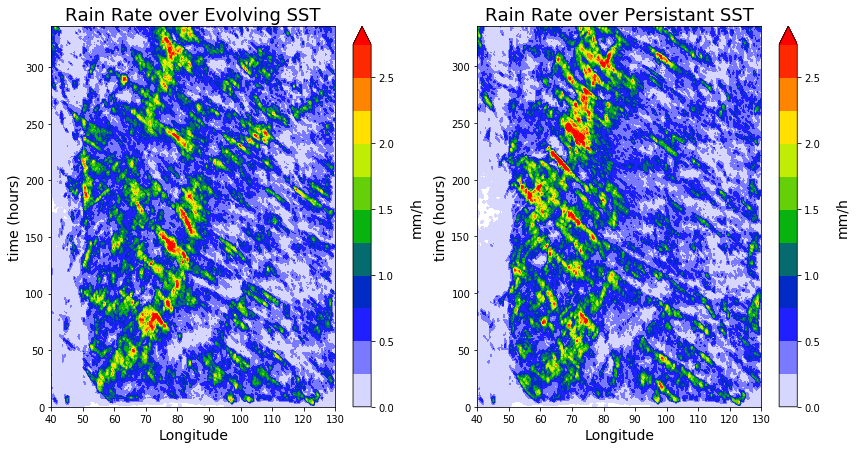

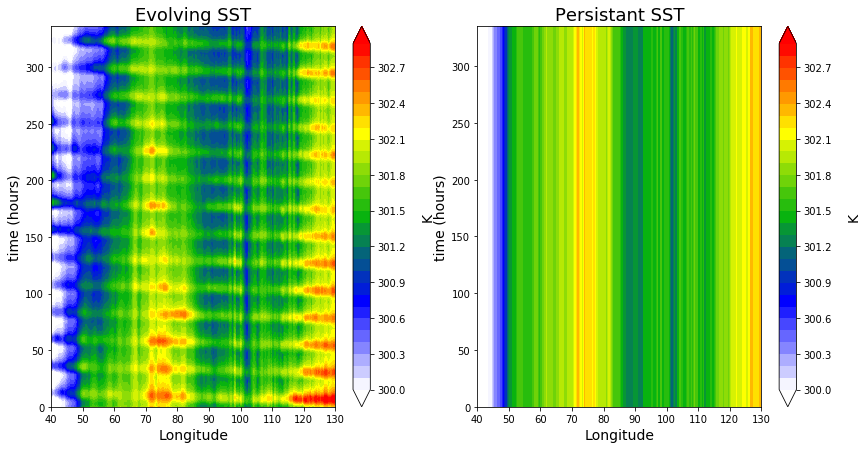

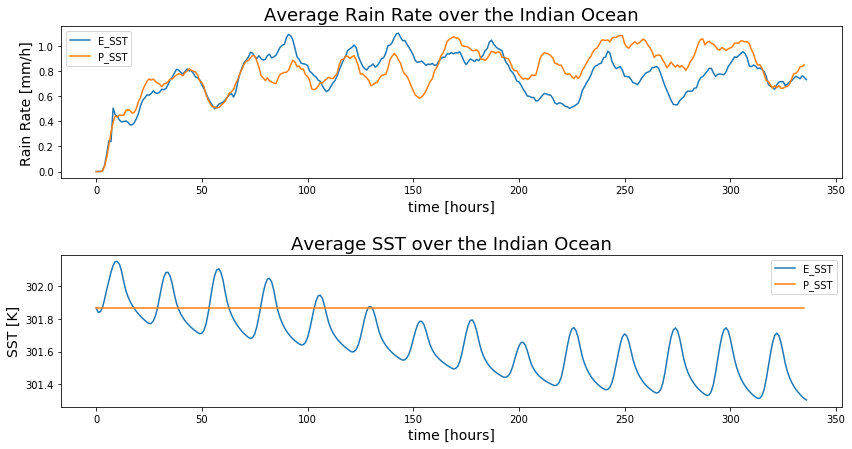

In [34]:
fig1()
fig2()
fig3()

## Can we explain the variablility of the rain by the SST?

In [116]:
def fig4():
    fig=plt.figure()
    plt.subplot(1,2,1)
    plt.scatter(coup_rr_t,coup_sst_t)
    
    plt.subplot(1,2,2)
    plt.scatter(ctl_rr_t,ctl_sst_t)
    

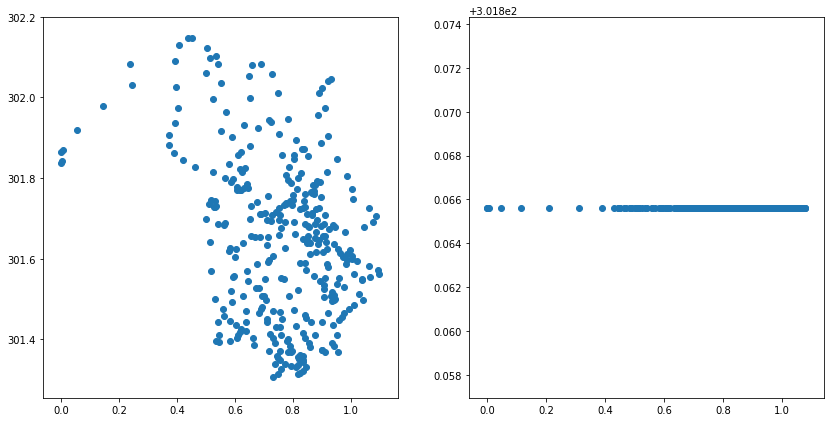

In [117]:
fig4()